# Brecha Salarial de Género en Argentina
Este proyecto fue realizado por el grupo 15 constituido por Daniela Ferraro y Jorgelina Sigal. Se utilizó un conjunto de datos provenientes del Ministerio de Trabajo, Empleo y Seguridad Social que contiene información sobre las remuneraciones en Argentina, desagregadas por género, tipo de industria y fecha. El objetivo es analizar las brechas salariales de género y su evolución. 

### Dataset
https://www.trabajo.gob.ar/estadisticas/oede/empleoyremuneracion.asp

### Contenido del dataset
#### Periodo: 
Indica año y mes al que corresponde la remuneración.
#### Industria: 
Nombre del sector o rama de actividad económica.
#### Género: 
Género del grupo de trabajadores al que pertenece la remuneración.
#### Mujer: 
Variable binaria (1 o 0) toma el valor 1 si es mujer, 0 si no. Útil para análisis estadístico, modelos y gráficos.
#### Varon: 
Variable binaria (1 o 0) toma el valor 1 si es varón, 0 si no. Útil para análisis estadístico, modelos y gráficos.
#### Remuneración: 
Remuneración promedio mensual para ese sector, género y período (en pesos argentinos).
#### Año:
Extracción del año de la columna período.

### Objetivo general
Analizar la evolución de la remuneración media del empleo registrado en el sector privado en Argentina, según rama de actividad y género, en el período comprendido entre enero de 1996 y octubre de 2022, utilizando herramientas de data science, con el fin de identificar patrones, desigualdades y tendencias vinculadas a la brecha salarial de género en el mundo laboral.

### Objetivos específicos
- Procesar y limpiar el conjunto de datos proporcionado mediante herramientas de data science, utilizando bibliotecas como pandas para su análisis exploratorio.

- Describir la evolución temporal de la remuneración media del empleo registrado en el sector privado, diferenciando por género y rama de actividad (según el CIIU rev. 3 a dos dígitos).

- Comparar las trayectorias salariales entre varones y mujeres en los distintos sectores de actividad, identificando las ramas con mayores y menores brechas de género.

- Visualizar los resultados mediante gráficos que faciliten la comprensión de las desigualdades salariales en el período analizado.

- Aplicar un modelo de aprendizaje supervisado de regresión para predecir la remuneración media en función del género, la rama de actividad y el período, evaluando su desempeño y analizando la importancia relativa de cada variable.

- Reflexionar sobre las implicancias sociales y económicas de las desigualdades de género en el mundo laboral formal, a partir de los hallazgos del análisis de datos.

### Tecnologías
- Python 3
- Pandas
- Jupyter Notebook
- Visual Studio Code
- Matplotlib 
- Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Análisis y exploración de datos

In [2]:
remuneraciones = pd.read_csv('Remuneraciones.csv', header=0, skiprows=[1])

In [3]:
# Vista general del dataset
print(remuneraciones.head())

  Periodo                Industria   Genero  Valor
0  feb-96  agricultura y ganaderia  Mujeres  406.8
1  mar-96  agricultura y ganaderia  Mujeres  399.7
2  abr-96  agricultura y ganaderia  Mujeres  375.9
3  may-96  agricultura y ganaderia  Mujeres  395.6
4  jun-96  agricultura y ganaderia  Mujeres  554.0


In [ ]:
# Asignación de nombres a las columnas
remuneraciones.columns = ['Periodo', 'Industria', 'Genero', 'Valor']
# Comprobación de existencia de nombres
print(remuneraciones.columns)

Index(['Periodo', 'Industria', 'Genero', 'Valor'], dtype='object')


In [ ]:
# Verificación de valores nulos
remuneraciones.isnull().sum()

Periodo      0
Industria    0
Genero       0
Valor        0
dtype: int64

In [ ]:
# Verificación de valores únicos en la columna
print(remuneraciones['Genero'].unique())

['Mujeres' 'Varones']


## Procesamiento y transformación de datos

En esta sección se lleva a cabo el procesamiento y la transformación de las variables relevantes para asegurar la calidad, consistencia y utilidad de los datos.
Las tareas incluyen:
- Conversión de tipos de datos.
- Codificación de variables categóricas.
- Escalado de características numéricas.
- Creación de nuevas variables que permitan enriquecer el análisis posterior.
Este paso es clave para garantizar que los algoritmos de machine learning puedan operar de manera efectiva y producir resultados confiables y representativos.

In [ ]:
# Reemplazo de abreviaturas en español por números
meses = {
    'ene': '01', 'feb': '02', 'mar': '03', 'abr': '04',
    'may': '05', 'jun': '06', 'jul': '07', 'ago': '08',
    'sep': '09', 'oct': '10', 'nov': '11', 'dic': '12'
}

# Aplicación del reemplazo
remuneraciones['Periodo'] = remuneraciones['Periodo'].str.lower().replace(meses, regex=True)

# Conversión a datetime
remuneraciones['Periodo'] = pd.to_datetime('01-' + remuneraciones['Periodo'], format='%d-%m-%y')

In [ ]:
# Extracción del año como número
remuneraciones['Año'] = remuneraciones['Periodo'].dt.year

In [ ]:
# Muestra del resultado de la conversión
print(remuneraciones['Periodo'])

0       1996-02-01
1       1996-03-01
2       1996-04-01
3       1996-05-01
4       1996-06-01
           ...    
36702   2022-06-01
36703   2022-07-01
36704   2022-08-01
36705   2022-09-01
36706   2022-10-01
Name: Periodo, Length: 36707, dtype: datetime64[ns]


In [ ]:
# Muestra del tipo de datos generado
print(remuneraciones.dtypes)

Periodo      datetime64[ns]
Industria            object
Genero               object
Valor               float64
Año                   int32
dtype: object


In [ ]:
# Conversión de texto a número
remuneraciones['Genero'] = remuneraciones['Genero'].map({'Varones': 0, 'Mujeres': 1})

In [ ]:
# Codificación de la variable industria
le = LabelEncoder()
remuneraciones['Industria'] = le.fit_transform(remuneraciones['Industria'])

In [ ]:
# Separación de X e y
X = remuneraciones[['Genero', 'Industria', 'Año']]
y = remuneraciones['Valor']

In [ ]:
# División del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Definición la grilla de hiperparámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
# Creación del modelo base
rf = RandomForestRegressor(random_state=42)

In [ ]:
# Configuración de GridSearchCV
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,scoring='r2',n_jobs=-1)

In [ ]:
# Ajustar el modelo
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [ ]:
# Obtención del mejor modelo
best_model = grid_search.best_estimator_

In [ ]:
# Predicción con el modelo óptimo
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluación
mse=mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)
print('mse:', mse)
print('r2',r2)

mse: 186112907.4982259
r2 0.9274721762258531


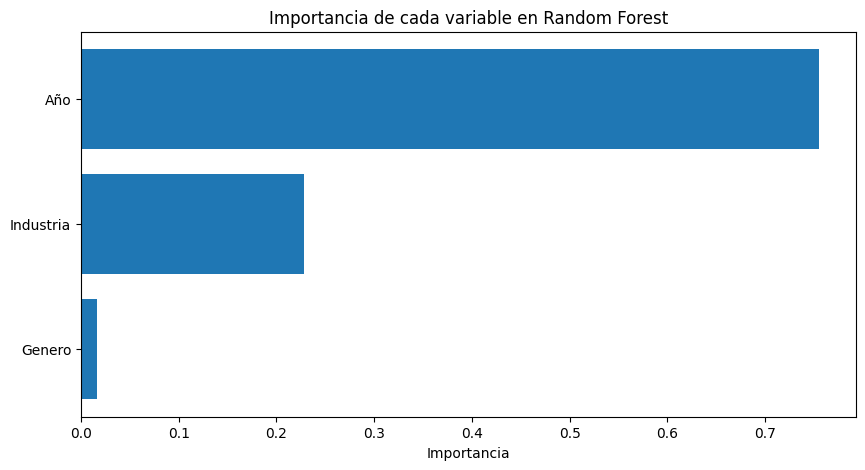

In [ ]:
# Gráfico donde se mide la importancia de las variables en juego
feature_importances = best_model.feature_importances_
features = X.columns
plt.figure(figsize=(10,5))
plt.barh(features, feature_importances)
plt.xlabel('Importancia')
plt.title('Importancia de cada variable en Random Forest')
plt.show()